## Lineal Regression

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

## Machine Learning Project in Python Step-By-Step

In this tutorial we are going to work through a small machine learning project end-to-end.
Here is an overview of what we are going to cover:
1. Loading the dataset.
2. Summarizing the dataset.
3. Visualizing the dataset.
4. Evaluating some algorithms.
5. Making some predictions.

Take your time and work through each step. Try to type in the commands yourself or
copy-and-paste the commands to speed things up. Start your Python interactive environment
and let's get started with your hello world machine learning project in Python.

## Load The Data
In this step we are going to load the libraries and the iris data CSV le from URL.

## Import libraries
First, let's import all of the modules, functions and objects we are going to use in this tutorial.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Load Dataset

In [3]:
d = {'x': [1, 2, 3, 4, 5], 'y': [1, 2, 3, 3, 5]}
dataset = pd.DataFrame(data=d)
dataset

,x,y
0,1,1
1,2,2
2,3,3
3,4,3
4,5,5


## Summarize the Dataset
Now it is time to take a look at the data. In this step we are going to take a look at the data a
few dierent ways:
- Dimensions of the dataset.
- Peek at the data itself.
- Statistical summary of all attributes.
- Breakdown of the data by the class variable.

Don't worry, each look at the data is one command. These are useful commands that you
can use again and again on future projects.

## Dimensions of Dataset
We can get a quick idea of how many instances (rows) and how many attributes (columns) the
data contains with the shape property.

In [4]:
# shape
print(dataset.shape)

(5, 2)


## Peek at the Data
It is also always a good idea to actually eyeball your data.

In [5]:
dataset

,x,y
0,1,1
1,2,2
2,3,3
3,4,3
4,5,5


## Statistical Summary
Now we can take a look at a summary of each attribute. This includes the count, mean, the
min and max values as well as some percentiles.

In [6]:
# descriptions
print(dataset.describe())

              x        y
count  5.000000  5.00000
mean   3.000000  2.80000
std    1.581139  1.48324
min    1.000000  1.00000
25%    2.000000  2.00000
50%    3.000000  3.00000
75%    4.000000  3.00000
max    5.000000  5.00000


## Class Distribution
Let's take a look at the number of instances (rows) that belong to each class. We can view this
as an absolute count.

In [7]:
# class distribution
print(dataset.groupby('y').size())

y
1    1
2    1
3    2
5    1
dtype: int64


## Data Visualization
We now have a basic idea about the data. We need to extend this with some visualizations. We
are going to look at two types of plots:
- Univariate plots to better understand each attribute.
- Multivariate plots to better understand the relationships between attributes.


## Univariate Plots
We will start with some univariate plots, that is, plots of each individual variable. Given that
the input variables are numeric, we can create box and whisker plots of each.

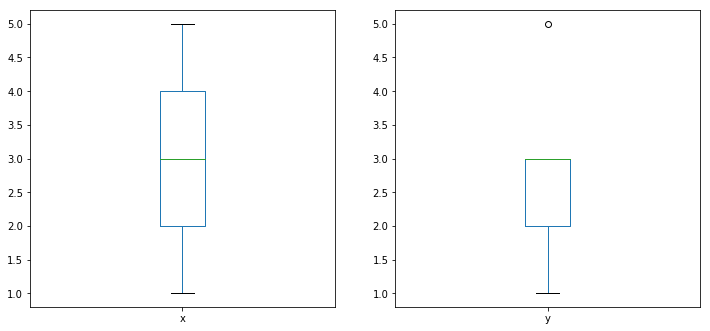

In [8]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(12, 12))
pyplot.show()

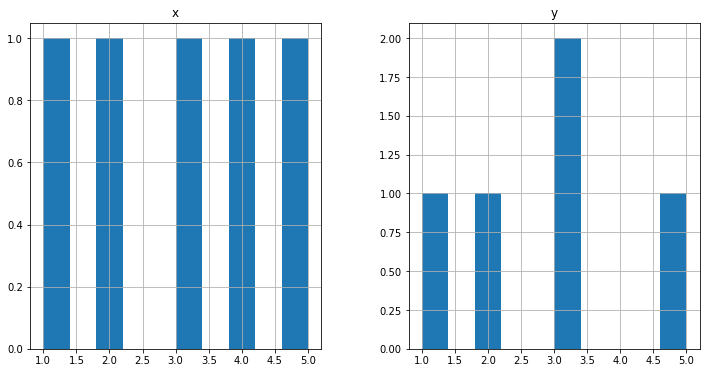

In [9]:
# histograms
dataset.hist(figsize=(12, 6))
pyplot.show()

## Multivariate Plots
Now we can look at the interactions between the variables. Let's look at scatter plots of all
pairs of attributes. This can be helpful to spot structured relationships between input variables.

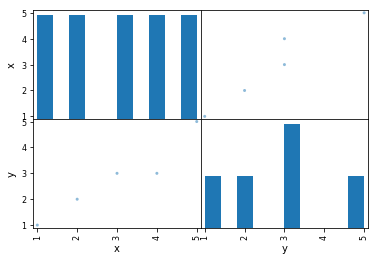

In [10]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

## Evaluate Some Algorithms
Now it is time to create some models of the data and estimate their accuracy on unseen data.
Here is what we are going to cover in this step:
1. Separate out a validation dataset.
2. Setup the test harness to use 10-fold cross-validation.
3. Build 5 dierent models to predict species from 
ower measurements
4. Select the best model.


## Test Harness
We will use 10-fold cross-validation to estimate accuracy on unseen data. This will split our
dataset into 10 parts, e.g. the model will train on 9 and test on 1 and repeat for all combinations
of train-test splits. We are using the metric of accuracy to evaluate models. This is a proportion
of the number of correctly predicted instances divided by the total number of instances in the
dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring
variable when we run build and evaluate each model next.
19.5.3 Build Models
We don't know which algorithms would be good on this problem or what congurations to use.
We got an idea from the plots that some of the classes are partially linearly separable in some
dimensions, so we are expecting generally good results. Let's evaluate six dierent algorithms:
- Logistic Regression (LR).
- Linear Discriminant Analysis (LDA).
- k-Nearest Neighbors (KNN).
- Classication and Regression Trees (CART).
- Gaussian Naive Bayes (NB).
- Support Vector Machines (SVM).

This list is a good mixture of simple linear (LR and LDA), and nonlinear (KNN, CART,
NB and SVM) algorithms. We reset the random number seed before each run to ensure that
the evaluation of each algorithm is performed using exactly the same data splits. It ensures the
results are directly comparable. Let's build and evaluate our ve models:

In [11]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [12]:
array = dataset.values
X = array[:,0:1]
Y = array[:,1]

In [13]:
X

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [14]:
Y

array([1, 2, 3, 3, 5])

In [22]:
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=42)

In [23]:
X_train

array([[3],
       [1],
       [4]])

In [24]:
X_test

array([[2],
       [5]])

In [25]:
y_train

array([3, 1, 3])

In [26]:
y_test

array([2, 5])

In [27]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=2, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.250000 (0.250000)
CART: 0.416667 (0.083333)
NB: 0.416667 (0.083333)
SVM: 0.416667 (0.083333)


/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.",

## Select The Best Model
We now have 6 models and accuracy estimations for each. We need to compare the models to
each other and select the most accurate. Running the example above, we get the following raw
results:

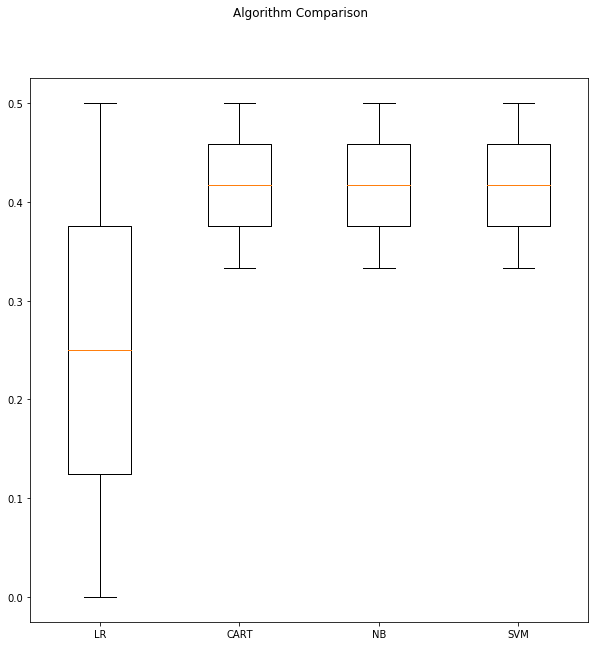

In [28]:
# Compare Algorithms
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Make Predictions
The NB algorithm was the most accurate model that we tested. Now we want to get an idea
of the accuracy of the model on our validation dataset. This will give us an independent nal
check on the accuracy of the best model. It is important to keep a validation set just in case
you made a slip during training, such as overtting to the training set or a data leak. Both
will result in an overly optimistic result. We can run the NB model directly on the validation
set and summarize the results as a nal accuracy score, a confusion matrix and a classication
report.

# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

In [32]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, Y)
predictions = clf.predict(X_test)
print(predictions)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[2 5]
1.0
[[1 0]
 [0 1]]
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



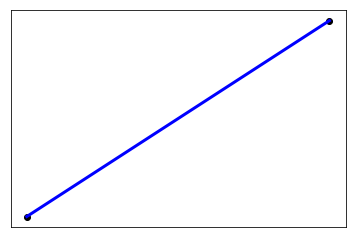

In [36]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, predictions, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Finalize Your Model with pickle
Pickle is the standard way of serializing objects in Python. You can use the pickle1 operation
to serialize your machine learning algorithms and save the serialized format to a le. Later you
can load this le to deserialize your model and use it to make new predictions. The example
below demonstrates how you can train a logistic regression model on the Pima Indians onset of
diabetes dataset, save the model to le and load it to make predictions on the unseen test set.

machine_learning_mastering_with_python

In [37]:
# Save Model Using Pickle
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load

In [39]:
# save the model to disk
filename = 'finalized_model5.sav'
dump(clf, open(filename, 'wb'))
# some time later...
# load the model from disk
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

1.0


## Tips for Finalizing Your Model
This section lists some important considerations when nalizing your machine learning models.
 Python Version. Take note of the Python version. You almost certainly require the
same major (and maybe minor) version of Python used to serialize the model when you
later load it and deserialize it.
 Library Versions. The version of all major libraries used in your machine learning
project almost certainly need to be the same when deserializing a saved model. This is
not limited to the version of NumPy and the version of scikit-learn.
 Manual Serialization. You might like to manually output the parameters of your
learned model so that you can use them directly in scikit-learn or another platform in
the future. Often the techniques used internally by machine learning algorithms to make
predictions are a lot simpler than those used to learn the parameters and can be easy to
implement in custom code that you have control over.
Take note of the version so that you can re-create the environment if for some reason you
cannot reload your model on another machine or another platform at a later time.

In [1]:
import pandas as pd
import numpy as np
from statistics import mean

In [2]:
d2 = {'x': [1, 2, 3, 4, 5], 'y': [1, 2, 3, 3, 5]}
dataset2 = pd.DataFrame(data=d2)
dataset2

,x,y
0,1,1
1,2,2
2,3,3
3,4,3
4,5,5


In [3]:
mean_x = mean(dataset2['x'])
mean_x

3

In [4]:
mean_y = mean(dataset2['y'])
mean_y

2.8

B0 = mean(y) - B1 * mean(x)

B1 = corr(x; y) . stdev(y) / stdev(x)

In [5]:
import math

def average(x):
    assert len(x) > 0
    return float(sum(x)) / len(x)

def pearson_def(x, y):
    assert len(x) == len(y)
    n = len(x)
    assert n > 0
    avg_x = average(x)
    avg_y = average(y)
    diffprod = 0
    xdiff2 = 0
    ydiff2 = 0
    for idx in range(n):
        xdiff = x[idx] - avg_x
        ydiff = y[idx] - avg_y
        diffprod += xdiff * ydiff
        xdiff2 += xdiff * xdiff
        ydiff2 += ydiff * ydiff

    return diffprod / math.sqrt(xdiff2 * ydiff2)

In [6]:
print(pearson_def([1,2,3,4,5], [1,2,3,3,5]))

0.9594032236002469


In [7]:
std_x = np.std(dataset2['x'])
std_x

1.4142135623730951

In [8]:
std_y = np.std(dataset2['y'])
std_y 

1.32664991614216

In [9]:
B1 = pearson_def([1,2,3,4,5], [1,2,3,3,5]) * (std_y / std_x)
B1

0.8999999999999999

In [10]:
B0 = mean_y - B1 * mean_x
B0

0.10000000000000009

new_y = B0 + B1 * x

## Prediction New dataset

In [12]:
data_x = np.arange(6,11)
data_x

array([ 6,  7,  8,  9, 10])

In [16]:
data_y = []
for i in data_x:
    y_ = B0 + B1 * i    
    data_y.append(y_)

    print(data_y)
    

[5.5]
[5.5, 6.399999999999999]
[5.5, 6.399999999999999, 7.299999999999999]
[5.5, 6.399999999999999, 7.299999999999999, 8.2]
[5.5, 6.399999999999999, 7.299999999999999, 8.2, 9.1]


In [17]:
df = pd.DataFrame({'x': data_x,
                   'y': data_y})

In [18]:
df

,x,y
0,6,5.5
1,7,6.4
2,8,7.3
3,9,8.2
4,10,9.1


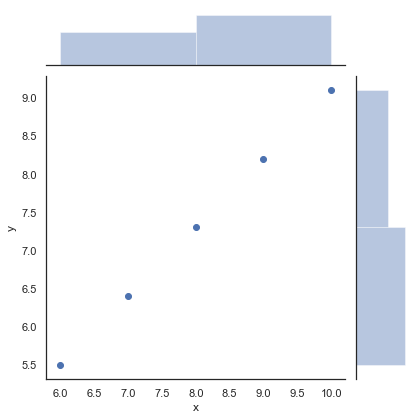

In [26]:
import numpy as np, pandas as pd; np.random.seed(0)
import seaborn as sns; sns.set(style="white", color_codes=True)
p = sns.jointplot(data=df,x='x', y='y')

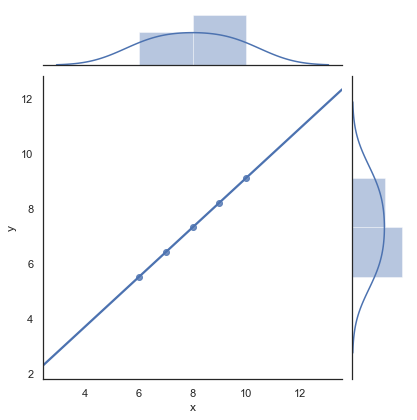

In [28]:
 g = sns.jointplot("x", "y", data=df, kind="reg")

In [19]:
df.shape

(5, 2)

In [20]:
std_x2 = np.std(df['x'])
std_x2

1.4142135623730951

In [21]:
std_y2 = np.std(df['y'])
std_y2

1.2727922061357855

In [22]:
B1_2 = pearson_def([6,7,8,9,10], [5.5,6.4,7.3,8.2,9.1]) * (std_y2 / std_x2)
B1_2

0.8999999999999999